### Hyperparameter tuning

Small set of hyperparameters (ML): grid search\
Large set of hyperparameters (DL): random values / bayesian optimization

Gaussian Process (GP) / Bayesian Optimization

In supervised learning, we observe inputs $\mathbf x_i$ and outputs $y_i$.\
We assume that $y_i = f(\mathbf x_i)$ for some unknown function $f$, possibly corrupted by noise.\
The optimal approach is to infer (conjecture) a _distribution over functions_ given the data, $p(f|\mathbf X, \mathbf y)$, and then use this to make predictions given new inputs.

$$
p(y_*|\mathbf x_*, \mathbf X, \mathbf y) = \int p(y_*|f,\mathbf x_*) p(f|\mathbf X, \mathbf y)df
$$

Up until now, we have focused on parametric representations for the function $f$, so that instead of inferring $p(f|\mathcal D)$, we infer $p(\bm{\theta}|\mathcal D)$.\
We discuss a way to perform Bayesian inference over functions themselves.

A GP defines a prior over functions $f$, which can be converted into a posterior over functions once we have seen some data $\mathbf x_i$.

we only need to be able to define a distribution over the function’s values at a finite, but arbitrary, set of points, say $\mathbf x_1, \cdots \mathbf x_N$.

A GP assumes that $p(f(x_1), \cdots, f(x_N))$ is jointly Gaussian

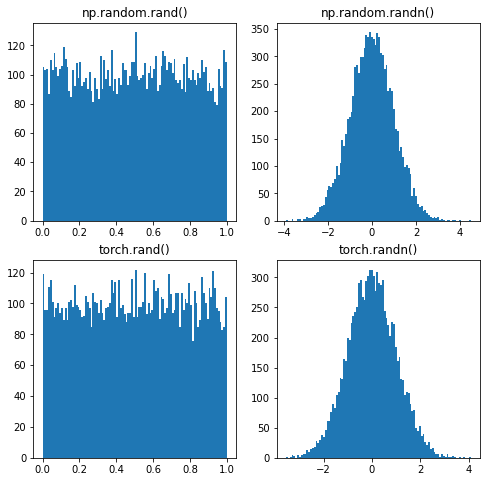

In [103]:
import numpy as np
import torch
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.title('np.random.rand()')
plt.hist(np.random.rand(10000), bins=100)
plt.subplot(2,2,2)
plt.title('np.random.randn()')
plt.hist(np.random.randn(10000), bins=100)

plt.subplot(2,2,3)
plt.title('torch.rand()')
plt.hist(torch.rand(10000).numpy(), bins=100)
plt.subplot(2,2,4)
plt.title('torch.randn()')
plt.hist(torch.randn(10000).numpy(), bins=100)
plt.show()

Batch Normalization (BN)

$\mathbf x \to \Phi(\cdot) \to \mathbf a$\
$\mathbf x \to \text{BN}(\cdot) \to \mathbf z \to \Phi(\cdot) \to \mathbf a$ (prefered) \
$\mathbf x \to \Phi(\cdot) \to \mathbf a \to \text{BN}(\cdot) \to \mathbf z$

Input: Values of $x$ over mini-batch: $\mathcal B = \{x_{1:m}\}$\
Output: $\{y_i = \text{BN}_{\gamma, \beta}(x_i)\}$

$$
\begin{align*}
    \mu_{\mathcal B} &\leftarrow
    \frac{1}{m} \sum_{i=1}^{m} x_i \\

    \sigma_{\mathcal B}^{2} &\leftarrow 
    \frac{1}{m} \sum_{i=1}^{m} {(x_i - \mu_{\mathcal B})^2} \\

    \hat{x}_i &\leftarrow
    \frac{x_i - \mu_{\mathcal B}}{\sqrt{\sigma_{\mathcal B}^2 + \epsilon}}\\

    y_i &\leftarrow
    \gamma \hat{x}_i + \beta \equiv \text{BN}_{\gamma, \beta}(x_i)
\end{align*}
$$

if $\gamma = \sqrt{\sigma^2 + \epsilon}$ and $\beta = \mu$, then $y_i = x_i$.

During training time, $\mu$, $\sigma^2$ are the mean and variance of a single minibatch.\
During test time, $\mu$, $\sigma^2$ are the ground truth of the real world. we use the exponentially weighted average of $\mu$, $\sigma^2$ of a training examples (mini-batches) to represent the real world values. (either, compute the values by putting the whole $X_\text{train}$ to the model after training.)

### Softmax

$$
\mathcal L(\hat y, y) = -\sum_{j=1}^{n} y_j \log \hat{y_j}\\
J = \frac{1}{m} \sum_{i=1}^{m} \mathcal L(\hat y^{(i)}, y^{(i)})
$$

### Tensorflow

In [104]:
import numpy as np
import tensorflow as tf

print(f"{tf.__version__ = }")

tf.__version__ = '2.13.0'


In [105]:
w = tf.Variable(0, dtype=tf.float32)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)

def train_step():
    with tf.GradientTape() as tape:
        cost = (w - 5)**2
    trainable_variables = [w] # parameters
    grads = tape.gradient(cost, trainable_variables)
    optimizer.apply_gradients(zip(grads, trainable_variables))

print(w)

train_step()
print(w)

for _ in range(100):
    train_step()
print(w)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.09999931>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0394363>


In [106]:
w = tf.Variable(0, dtype=tf.float32)
x = np.array ([1.0, -10.0, 25.0], dtype=np.float32)
optimizer = tf.keras.optimizers.Adam(0.1)

def training(x, w, optimizer):
    def cost_fn():
        return x[0] * w**2 + x[1]*w + x[2]
    for _ in range(100):
        optimizer.minimize(cost_fn, [w])
    return w

print(w)

w = training(x, w, optimizer)
print(w)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.039002>
